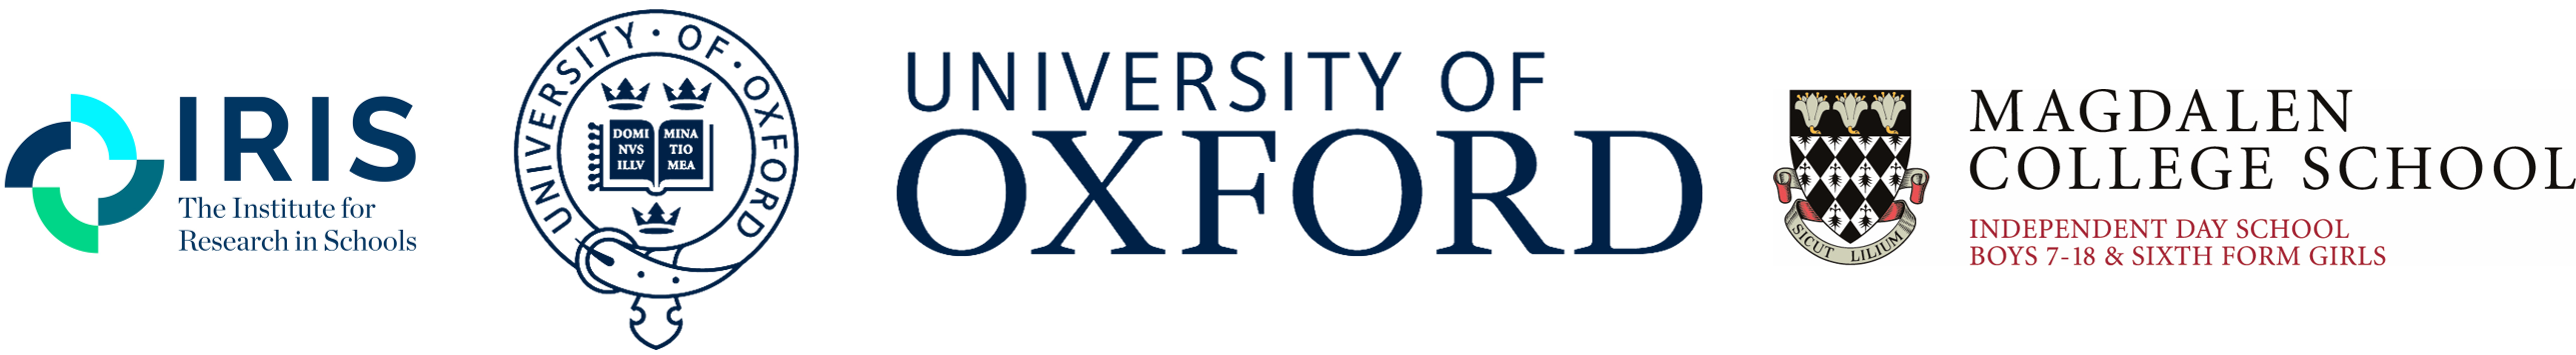

# Python Physics 2

### Random numbers

A lot of what we do in the physical sciences is influenced by random processes at some level. Some of those randomizing effects are caused by us not knowing everything about a system, others are just fundamentally random in nature. Examples:

  * decay of a radioactive atom - random when it happens (fundamentally random)
  * looking at a patch of sky and waiting for a supernova to happen (random because we don't know the evolutionary state of each star in detail)
  * measuring the same quantity multiple times and getting slighltly different results: the "randomness" is then caused by the limited accuracy of our measurement (random because we don't know when we make a small mistake and in which direction it goes).


-> When we want to model physical systems computationally, we need some way of modelling randomness!

However, it is actually a bit tricky to get real randomness out of a computer.

How can we create a sequence of random numbers? There are two fundamental ways of doing that:

  * Random number generators:
  
    These are actual physical processes that have a random outcome. They are "true" random generators. Examples:
      * tossing a coin
      * rolling dice
      * waiting for a Uranium atom to decay (random when it happens)
      
  
  * Pseudo-random number generators
    
    These are deterministic ways in which a mathematical formula, or an algorithm, produces a sequence of numbers that *look* like they are random numbers. However, they are deterministic in the sense that we can reproduce the exact sequence of numbers when we choose the same start point (called "seed"). So they are not really random.


Computers use pseudo-random number generators. We will look at a few ways how this can be done.

#### Example 1: The Middle-Square-Method

This is a really old idea how to generate a sequence of seemingly random numbers. In comparison to modern methods, it's not very good, and we'll see why in a little bit. However, it is *really* old: the first known reference to this method is from the year 1250, written down by a Franciscan monk named Brother Edvin. The method was re-discovered by John von Neumann in 1949 and made popular in a programming context.


This is how it works. Let's say we want to generate pseudo-random numbers that have 4 digits.

1) Choose a number with 4 digits. For example, 1546.

2) Calculate the square of that number:

In [1]:
print(546**2)

298116


3) If this new number has less than 8 digits, add zeros in front of it until it has 8 digits. So, in this case, our new number is:

02390116.

4) Discard the first two and the last two digits and only keep the middle four digits:

~~02~~3901~~16~~

This leaves us with:

3901.

5) This is our new "random" number. This new number, 3901, is then used to create the next number in the "random" sequence.

This is not a very good pseudo-random number generator. Any idea why?

What happens if we arrive at a number where the middle 4 digits of the square are all zeros?

Right - all subsequent numbers will be zeros again, and the random sequence gets stuck.



This algorithm can also easily get stuck on other numbers. For example, let's say we start with the number 2500. Then we get:

2500 -> squared -> 06250000 -> new number 2500


Some other numbers form very short cycles that repeat forever once you hit one of the numbers inside the cycle:

0540 -> squared -> 00291600 -> new number 2916

2916 -> squared -> 08503056 -> new number 5030

5030 -> squared -> 25300900 -> new number 3009

3009 -> squared -> 09054081 -> new number 0540. Full circle.


This particular algorithm gets worse if we want to create pseudo-random numbers with fewer digits, say only 2 digits. Then a sequence could go:

13 -> squared -> 0169 -> new number 16.

The longest number of steps that exists for the middle-square algorithm with 2-digit numbers before we enter a cycle is 14.

#### Example 2: The modulo method. Official name: "Linear congruential generator"

The *modulo* is the rest that remains when you divide one integer number by another integer number. It is abbreviated as "mod".

For example, 

5 mod 2 = 1,

because 5 divided by 2 is 2 plus a rest of 1. (5 = 2 x 2 + 1).

6 mod 2 = 0,

because 6 divided by 2 is 3 plus a rest of 0. (6 = 3 x 2).

The modulo can be used to generate pseudo-random numbers like this:

1) Choose 3 large integer numbers a, b, and m. Let's say a = 123456, b = 987654, and m = 192837.

2) Choose a start number X for the sequence, say X = 100.

3) Calculate the next number in the sequence according to this formula:

X_new = (aX + b) mod m

All the methods we have looked at so far generate pseudo-random numbers that are roughly *uniformly distributed* between two values. For the middle-square method, the borders for the created numbers are 0 and 9999 (for the 4-digit version), and for the modulo method, it is numbers between 0 and whatever we have chosen for m.

This is what such a random number distribution can look like graphically. I am using a very well-working built-in function of python's numpy package for this to create uniformly distributed numbers between 0 and 10 (using real numbers, not integer numbers, so values like 5.448 are allowed).

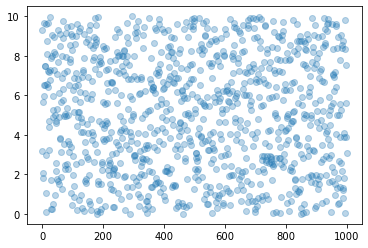

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345) # This makes python repeat the same numbers every time we run the program.
# I can choose any number to go inside the brackets of "seed".

my_numbers = np.random.uniform(low=0, high=10, size=1000)

plt.plot(np.arange(0, len(my_numbers)), my_numbers, 'o', alpha=0.3)
# The alpha=0.3 modifier makes the symbols slightly transparent so that we can see the density of the data points better.
plt.show()

In physics, we often want our numbers to be random, but *not* uniformly distributed. For example, measurement errors in physics often follow a Gaussion or "normal" distribution. This means that we will very often measure something that is close to the mean value of all our measurements, and only rarely we will mess up our measurement so badly that we get a very extreme outlier.

So in the end we would like to get something that looks like this (I'm again using a built-in python function for convenience):


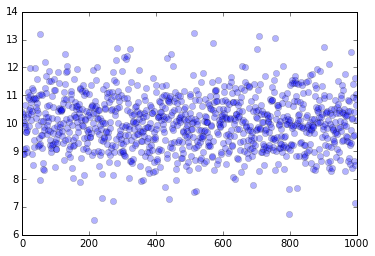

In [36]:
np.random.seed(9876)

gaussian_numbers = np.random.normal(loc=10, scale=1, size=1000)
# loc is where we want the mean of the numbers to be,
# and scale is a measure for how wide the numbers should scatter around that mean (the standard deviation)

plt.figure()
plt.plot(np.arange(0, len(gaussian_numbers)), gaussian_numbers, 'o', alpha=0.3)
plt.show()

### Plotting a histogram of our pseudo-random data

We will deal quite often with histograms when we are working with sequences of (pseudo-)random numbers.

A histogram is a graphical representation of the distribution of data points.

A good example is the distribution of marks on an exam. Let's say marks are measured in percent, and we have 10 students with the following marks:


In [5]:
marks = np.array([71, 94, 54, 34, 82, 76, 68, 79, 98, 68])
plt.hist(marks, bins=np.arange(0, 101,10))

A condensed version of looking at that data is to look at how many students achieved a mark in a certain range, called "bin". Let's say we are interested in bins of width 10, and they go from 0 to 10, 10 to 20, and so on. 

Then we have:

| bin        | \# of students |
| ---------- |:--------------:|
| 0-10       | 0              |
| 10-20      | 0              |
| 20-30      | 0              |
| 30-40      | 1              |
| 40-50      | 0              |
| 50-60      | 1              |
| 60-70      | 2              |
| 70-80      | 3              |
| 80-90      | 1              |
| 90-100     | 2              |



A histogram of this binned data then looks like this:

(array([0., 0., 0., 1., 0., 1., 2., 3., 1., 2.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

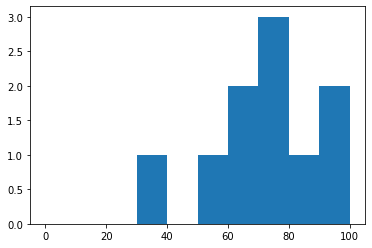

In [6]:
plt.hist(marks, bins=np.arange(0, 101,10))

Python's matplotlib package calculated a histogram for us and plots it at the same time. The command for this is, as seen above, "plt.hist", and we need to give inside the round brackets the raw data (here "marks"), and the edges of the bins we want. np.arange(0, 101,10) is the integer numbers from 0 to one smaller than 101, in steps of 10, i.e. [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100].


We can also decide to use larger bins with width 20, then the histogram will look like this:

(array([0., 1., 1., 5., 3.]),
 array([  0,  20,  40,  60,  80, 100]),
 <a list of 5 Patch objects>)

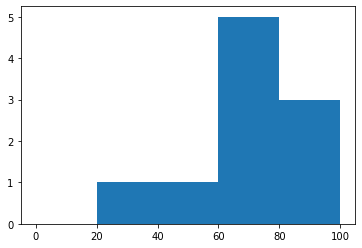

In [7]:
plt.figure()
plt.hist(marks, bins=np.arange(0, 101,20))

## Worksheet materials

### Uniformly distributed pseudo-random numbers with the modulo method

Let's make our own pseudo-random number generator. We'll use the modulo method for this.

Remember, we need to choose 3 large integer a, b, and m, and a start number X, and then we calculate the next number like this:

X_new = (aX + b) mod m

#### Exercise 1: 

1a) Write a function called random_modulo which takes a, b, and m as variables, and also takes some start number X and the desired length L of the random sequence as variables (so in total the function needs 5 variables).

Then create a sequence starting with the number 100 and having a total length of 1000 numbers, using your function.

1b) Plot those values graphically, like we did in the examples above. Does the plot look random? Are there repeating patterns?

1c) Play around with the values for a, b, and m, and find a few combinations which give very random-looking plots, and others which have some patterns in them. For which kind of numbers do you tend to get good (random) or bad (pattern-like) results?


Remember, these are the packages you will need to import at the beginning of your python script to enable numpy built-in functions and plotting with matplotlib:

In [43]:
import numpy as np
import matplotlib.pyplot as plt

### Monte Carlo simulations

Now that we know how to produce random numbers with the help of a computer, we might as well do something useful with it.

Monte Carlo simulations are computational algorithms that use random numbers ("random sampling") to get a numerical result.

How does this work?

Step 1: Define what the range of possible inputs is

Step 2: Produce a random sampling of the possible input numbers

Step 3: Perform the calculation describing the physical problem, using the random numbers from Step 2 as input data

Step 4: Evaluate the result (look at the output numbers).

When we have done all this, we have successfully simulated a physical problem using the Monte Carlo method.

#### Example: Rolling 2 dice

Let's say we roll 2 dice and what to figure out how likely it is that we roll a total of 11 or more eyes. We *could* figure this out without a simulation: but that won't always be true.

So let's say we do this brute force with a simulation.

Step 1: possible input range: 1, 2, 3, 4, 5, 6 for each die.

Step 2: Make a random sample of those input values. Specifically, let's say we make 10000 random numbers for each die, going from 1 to 6.

In [11]:
import numpy as np

np.random.seed(1234)

die_1 = np.random.randint(1,7,10000)
die_2 = np.random.randint(1, 7, 10000)


Step 3: Make the calculation, i.e. in this case the sum of the eyes shown by the two dice.

In [12]:
result = die_1 + die_2

Step 4: evaluate the results. This means we want to see how many of our 1000 random results have a value of 11 or more (specifically, 11 or 12 because 12 is the maximum we can roll with 2 dice).

Python has a really convenient way for doing this, namely with a concept called *masks*.

#### Masks in python

We can have python compare the elements of an array to a condition, and the result is called a **mask**. The mask is either True or False for each element:

In [13]:
mymask = result >= 11

print(mymask[0:50])

[False False False  True False False False False False False  True False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False  True
 False  True]


So, if an element fulfills our condition, the mask has a value "True", otherwise the mask value is "false". 

And now we can use another very neat python construct. Python internally treats "True" as a "1", and "False" as a "0". Python also allows us to sum up all elements in an array by writing ".sum()" at the end of an array. So if we sum up all the elements in the mask, we get the number of True elements:


In [17]:
print(mymask.sum())

820


And this is how many elements we have in total:

In [15]:
print(len(result))

10000


Now we can calculate what fraction of all our result produced "True" when we asked for results with a value of 11 or larger.

In [18]:
print(mymask.sum()/len(result))

0.082


So our result is 0.082! Does that make sense? Let's do the mental exercise in any case: There are 36 different ordered pairs of 2 numbers we can roll, 3 out of those have a value of 11 or more (6+6, 5+6, 6+5), so we expect a fracyio of 3/36 = 1/12. This is numerically:

In [19]:
print(1/12)

0.08333333333333333


So our Monte Carlo simulation which yielded 0.082 did quite well!

#### Repeating pseudo-random experiments and the concept of a "seed"

Exactly how well did we do with our Monte Carlo simulation? Obviously, we're reasonably close to the true value, i.e. we're only off by a few percent:

In [21]:
monte_carlo_result = np.float(mymask.sum())/np.float(len(result))
true_result = 1./12.
error_from_true_result = monte_carlo_result/true_result - 1.

print("We're off by", error_from_true_result * 100, " percent.")

We're off by -1.5999999999999903  percent.


But is that because we were very lucky with our draw of pseudo-random numbers? Or particularly unlucky? Or is this a typical result?

We can test this by repeating the experiment and then looking at the *distribution* of results from the individual Monte Carlo simulations.

Let's say we want to run 10 Monte Carlo simulations. This means we need 10 different series of pseudo-random numbers for each die.

Let's also say we want our experiment to be *repeatable*, i.e. we want the same sequences of random numbers every time we run our program. This is possible by specifying the **seed** of the number sequence. 

We remember, the numbers we generate here are only pseudo-random, because they are generated by a predictable algorithm. The seed is a number which identifies the specific pseudo-random number sequence I request. For exmaple, with the middle-square method, the seed is equal to the first number I use in the algorithm. For the modulo-generator (remember, we had 3 large integers for that and a start number), I can imagine a seed which tells the program to look up a combination of those 4 numbers from some lookup-table.

Now we can complete our original task of making 10 repeatable Monte Carlo simulations for our 2 dice.

In [27]:
# put all our calculations into one neat function:
def MonteCarloDice(myseed):
    length = 10000 # how many random numbers per single die
    np.random.seed(myseed) # setting the seed for the first die
    die_1 = np.random.randint(1, 7, length)
    np.random.seed(myseed + 1) # setting a different seed for the second die.
    # technically we don't have to do this because python will choose
    # a new seed based on the first seed we specified,
    # and it will do so predictably.
    # But like this we have absolute control over what we're doing here
    # (without having to rely on Python's cleverness in the background).
    die_2 = np.random.randint(1, 7, length)
    result = die_1 + die_2
    mymask = result >= 11 # figure out how many results have 11 or more points
    MonteCarloResult = np.float(mymask.sum())/np.float(len(result)) # calculate ratio of reults >=11 to all results
    return MonteCarloResult

# make an array of 10 different seeds:
myseedlist = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# make an empty array in which to store the results of the 10 Monte Carlo simulations:
myresults = np.zeros(10)

# make a loop to perform the 10 simulations:
for i in np.arange(0, 10):
    myresults[i] = MonteCarloDice(myseedlist[i]) # using a different seed each time!

print(myresults)


[0.082  0.0802 0.0846 0.0855 0.0815 0.0849 0.0778 0.0854 0.0856 0.0862]


Let's make a plot of those values and see how they compare to the true value:

(-1.0, 10.0, 0.07, 0.09)

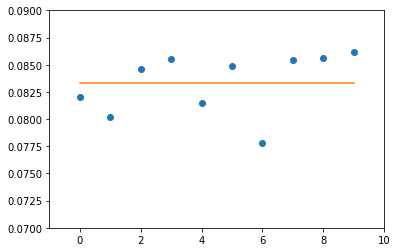

In [24]:
import matplotlib.pyplot as plt
# make some numbers from 0 to 9 as x coordinates:
x = np.arange(0, len(myresults))
# plot simulation results as dots:
plt.plot(x, myresults, 'o')
# and plot the true result as a line:
plt.plot(x, np.ones(len(x))*true_result, '-' )
# and adjust the plotting axes a bit so that the data points at 0 and 9 aren't cut in half:
plt.axis([-1, 10, 0.07, 0.09])

Now we can also define a more standardized way of measuring how large our scatter around the true value is. This is done through the concept of the *standard deviation*.

### Distributions and the standard deviation

Say we have random numbers (or really any sequence of data points):

$x_1, x_2, x_3, x_4, ... x_N$

The **mean** of those data points is defined as:

$\mu = \frac{1}{N} \cdot (x_1 + x_2 + x_3 + ... + x_N)$

And the **standard deviation** of the data from the mean is defined as:

$\sigma = \sqrt{\frac{1}{N} \cdot [(x_1 - \mu)^2  + (x_2 - \mu)^2 + ... +(x_N - \mu)^2]}$

The larger the standard deviation, the larger is the scatter of the data around the mean.

Specifically, for Gaussian (normal) distributions, 68% of the data will be contained in a range of $\pm 1$ standard deviation around the mean.

The blue data set has a smaller standard deviation than the red one:

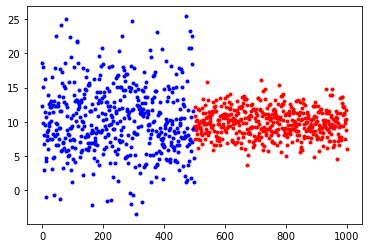

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

set_1 = np.random.normal(10, 5, 500)

set_2 = np.random.normal(10, 2, 500)

plt.plot(np.arange(0, len(set_1)), set_1, 'b.')
plt.plot(np.arange(len(set_1), len(set_1) + len(set_2)), set_2, 'r.')


#### Exercise
So we can now calculate the standard deviation of our 10 Monte Carlo simulation results from above.

### Snakes and Ladders

Now we can roll die and look at results. A practical application of this might be to calculate the distribution for the total number of moves you might expect in a game of Snakes and Ladders.

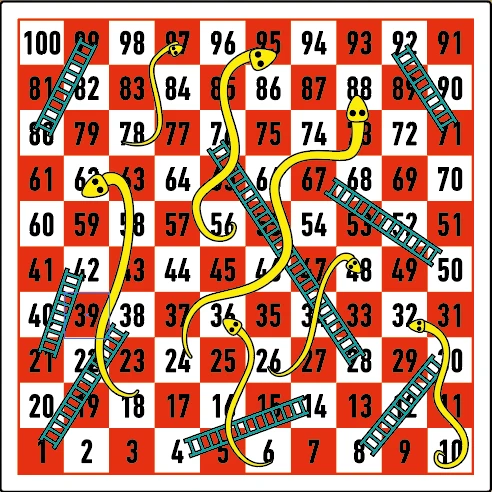

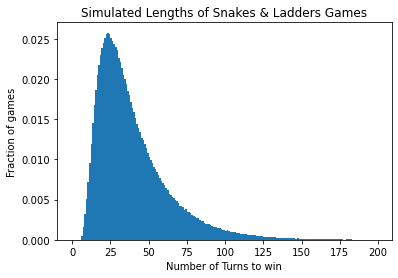

Above is a histogram for 100000 simulated games. Try and replicate this simulation and calculate the mean and standard deviation of the simulation. You should get a mean of about 39 moves. How do you decide you have done enough simulations?